# Density-Based Clustering of Applications with Noise (DBSCAN)
***
>**Group**: Group 16 <br>
**Authors**: Qichun Yu, Lilliam Norori Duarte

## Table of Contents
1. [Part 1: Implementing DBSCAN from Scratch](#Part-1:-Implementing-DBSCAN-from-Scratch)  
    1.1. [Import and data description](#Import-and-data-description)  
    1.2. [DBSCAN from scratch](#DBSCAN-from-scratch)  
    1.3. [Testing the model](#Testing-the-model)  
2. [Part 2: Comparing DBSCAN with k-means and Hierarchical Clustering](#Part-2:-Comparing-DBSCAN-with-k-means-and-Hierarchical-Clustering)  
    2.1. [Import and data description](#Import-and-data-description.)  
    2.2. [K-means vs. Agglomerative clustering vs. DBSCAN](#-K-means-vs.-Agglomerative-clustering-vs.-DBSCAN.)  
    2.3. [Best performing model](#Best-performing-model)

### Part 1: Implementing DBSCAN from Scratch
>**Main author:** Qichun Yu  

[Return to top](#Assignment-3:-Density-Based-Clustering-of-Applications-with-Noise-(DBSCAN))

#### Import and data description

In [1]:
# Import libraries
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#generate a random cluster dataset with make_blobs
X,y = make_blobs(n_samples=500, centers=4, n_features=2, random_state=800)

In [3]:
print(X)

[[-2.37773919e+00  4.07215763e+00]
 [-8.54986562e+00 -1.37899474e+00]
 [-8.68843627e+00 -2.81606274e+00]
 [-4.67023365e+00 -7.64131112e+00]
 [-5.27496984e+00  5.75205802e+00]
 [-3.95381032e+00 -5.47357671e+00]
 [-4.83409429e+00  4.84453829e+00]
 [-3.34251064e+00  5.36442184e+00]
 [ 8.83441699e-01  2.34052344e-01]
 [-8.25803572e+00 -2.11676232e+00]
 [ 4.69654466e-01 -1.52999450e-01]
 [-5.73622758e+00  5.83183977e+00]
 [-5.28015467e+00  6.18713671e+00]
 [-2.98484932e+00 -7.70660382e+00]
 [-3.95542756e+00  5.58278097e+00]
 [-6.01032308e-01 -7.50791288e+00]
 [-4.62623556e+00 -6.83805665e+00]
 [-7.25986375e+00 -9.99374162e-01]
 [-7.84305287e+00 -2.85419086e+00]
 [-9.98206619e+00 -2.89653424e+00]
 [-8.11328867e+00 -3.18907935e+00]
 [-4.65048416e+00  3.97171746e+00]
 [-4.63163117e+00  7.10384954e+00]
 [-7.66260222e+00 -3.16577473e+00]
 [-3.85773958e+00 -5.41315198e+00]
 [-5.23401945e-01 -8.51492449e+00]
 [-8.66123057e-01 -1.85679395e+00]
 [-2.22499989e+00 -8.00771394e+00]
 [-1.76620196e-01 -7

In [4]:
print(y)

[2 0 0 1 2 1 2 2 3 0 3 2 2 1 2 1 1 0 0 0 0 2 2 0 1 1 3 1 3 0 3 2 3 2 0 1 1
 0 0 1 1 3 3 0 3 0 2 0 1 3 1 1 1 0 2 0 2 2 2 1 3 1 0 3 2 2 3 3 3 0 2 0 3 1
 2 2 1 1 2 3 2 3 0 2 2 3 2 1 0 0 2 3 2 2 1 3 1 1 1 1 0 3 3 3 3 0 3 0 2 2 1
 3 2 2 1 1 2 0 1 0 1 2 3 0 0 2 3 3 3 0 3 1 2 0 2 2 0 1 3 0 3 1 0 2 0 3 0 2
 3 3 3 3 2 0 1 2 0 0 1 1 1 2 1 2 0 3 3 3 3 0 0 2 1 2 2 1 3 1 2 1 0 1 3 0 3
 2 3 1 0 0 3 3 0 1 3 2 2 3 0 2 2 2 0 3 1 1 2 2 2 2 0 3 1 1 0 0 2 1 2 0 1 2
 3 2 2 0 0 3 0 3 0 1 1 1 2 1 1 1 1 3 1 1 1 2 3 0 3 1 3 1 2 2 0 0 3 2 3 1 3
 0 1 2 1 2 3 1 0 2 1 1 1 2 3 2 1 3 0 0 0 2 0 3 1 2 3 1 3 0 0 3 0 2 2 3 0 3
 3 0 0 0 0 1 2 0 1 2 0 1 0 3 3 0 2 1 0 0 1 0 0 0 0 1 1 3 1 3 2 3 1 0 1 1 2
 1 0 0 2 3 2 3 2 1 1 1 0 3 3 2 3 3 0 2 0 0 0 1 2 2 0 3 1 1 2 2 3 1 2 3 0 1
 1 3 2 3 1 2 3 2 0 1 1 1 0 1 1 0 2 1 0 3 3 3 2 2 3 2 2 3 2 1 3 3 0 3 0 0 3
 0 2 3 1 3 3 3 1 3 0 0 2 3 3 3 3 1 3 1 2 1 2 0 3 0 2 0 0 2 2 2 0 0 0 3 0 1
 0 2 2 0 1 0 2 1 1 1 2 1 1 0 3 3 2 1 1 3 3 1 2 1 1 0 3 3 3 2 2 1 3 3 2 0 0
 2 0 2 1 0 1 1 2 0 3 2 3 

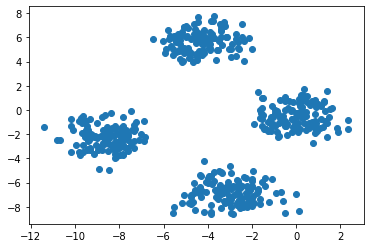

In [5]:
#Visualize the data
plt.scatter(X[:,0],X[:,1]) 
plt.show()

In [6]:
print(X.shape[0])

500


#### DBSCAN from scratch

In [7]:
#Create functions from scratch that allow you to call DBSCAN on a dataset.
def scratch_DBSCAN(x, eps, min_samples):
    """
    param x (list of vectors): the dataset to be clustered
    param eps (float): neighborhood radius threshold
    param min_samples (int): minimum number of points required 
                        to justify membership within a cluster
    """
    
    labels = [0]*x.shape[0] # Create a label holder to comprise all 0s
    C = 0 #Arbitrary starting "current cluster" ID
    
    # Loop over all the points p in dataset x, 'p' is the index of the datapoint
    for p in range(0, x.shape[0]):
        # check points have been visit or not, only unvisited points can be evaluated as neighborhood centers
        if not (labels[p] == 0):
            continue
        # use neighborhood_search function to find all of p's neighbors
        neighbors = neighborhood_search(x, p, eps)
        
        # classified as noise (-1) when there are not enough neighbor points, else use as neighborhood cluster
        if len(neighbors) < min_samples:
            labels[p] = -1
        else:
            C += 1
            neighbor_cluster(x, labels, p, neighbors, C, eps, min_samples)
    return labels

def neighbor_cluster(x, labels, p, neighbors, C, eps, min_samples):
    
    labels[p] = C #assign the cluster label to original point
    
    # Evaluate each neighbor of p
    i = 0
    while i < len(neighbors):
        # get the next point from the queue
        potential_neighbor_ix = neighbors[i]
        # if potential_neighbor_ix is noise (-1), assign it to current cluster
        if labels[potential_neighbor_ix] == -1:
            labels[potential_neighbor_ix] = C
        
        # add unvistited potential_neighbor_ix to current cluster
        elif labels[potential_neighbor_ix] == 0:
            labels[potential_neighbor_ix] = C
            
            # Find neighbors of potential neighbor
            potential_neighbors_cluster = neighborhood_search(x, potential_neighbor_ix, eps)
            
            if len(potential_neighbors_cluster) >= min_samples:
                neighbors = neighbors + potential_neighbors_cluster
            
        i += 1 #increase i by 1 to evaluate next neighbor

def neighborhood_search(x, p, eps):
    neighbors = [] #create an empty list to store neighbors
    
    # Loop over all the points in the dataset
    for potential_neighbor in range (0, x.shape[0]):
        
        # If a nearby point falls below the neighborhood radius threshold, add to neighbors list
        if np.linalg.norm(x[p] - x[potential_neighbor]) < eps:
            neighbors.append(potential_neighbor)
    
    return neighbors

#### Testing the model

In [8]:
#Use your created DBSCAN implementation to find clusters in the generated dataset.
labels = scratch_DBSCAN(X, 0.6, 5)

Test other hyperparameters

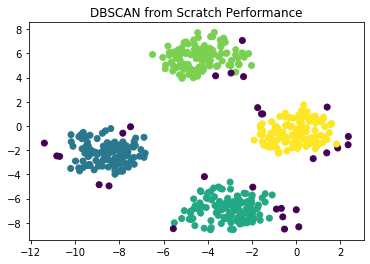

In [9]:
#Visualize the clustering performance of your DBSCAN implementation from scratch.b
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN from Scratch Performance")
plt.show()

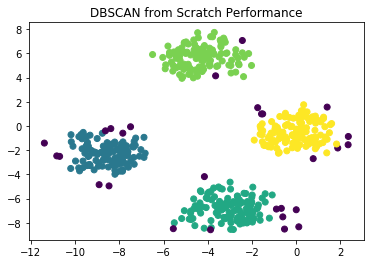

In [10]:
#testing with eps=0.7, min_samples= 6
labels_2 = scratch_DBSCAN(X, 0.7, 6)

#Visualize the clustering performance of your DBSCAN implementation
plt.scatter(X[:,0], X[:,1], c=labels_2)
plt.title("DBSCAN from Scratch Performance")
plt.show()

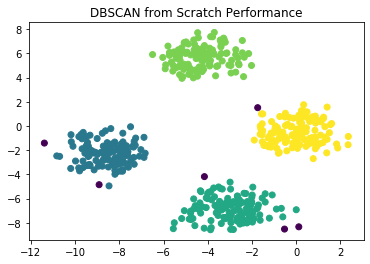

In [11]:
#testing with eps=1, min_samples= 10
labels_3 = scratch_DBSCAN(X, 1, 10)

#Visualize the clustering performance of your DBSCAN implementation
plt.scatter(X[:,0], X[:,1], c=labels_3)
plt.title("DBSCAN from Scratch Performance")
plt.show()

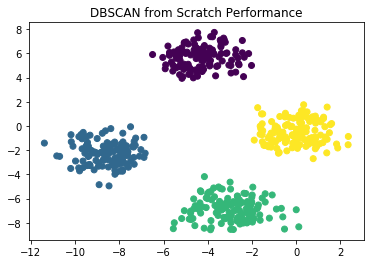

In [12]:
#testing with eps=2, min_samples= 5
labels_4 = scratch_DBSCAN(X, 2, 5)

#Visualize the clustering performance of your DBSCAN implementation
plt.scatter(X[:,0], X[:,1], c=labels_4)
plt.title("DBSCAN from Scratch Performance")
plt.show()

**Observation**

From the plot above, we can clearly see that there are four defined clusters generated from the DBSCAN model. There are a few purple data points that are classified as random noise, which are the points that are falling out of the neighbourhood range. A small amount of noise is acceptable; therefore, the eps size of 0.6 and the minimum number of points of 5 seem to be reasonable. After testing with different hyperparameters, we found that when eps increase to 2 the data points from the top cluster become all purple(noise), which is not good. The eps of 1 and min_samples of 10 seems to be the one with the least amount of noise. 

### Part 2: Comparing DBSCAN with k-means and Hierarchical Clustering
>**Main author:** Lilliam Norori Duarte  

[Return to top](#Assignment-3:-Density-Based-Clustering-of-Applications-with-Noise-(DBSCAN))

#### Import and data description.
>Data Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine)

In [13]:
from sklearn.cluster \
import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Load Wine data set
wine_df = pd.read_csv("wine_data.csv")
# Show sample of data set
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


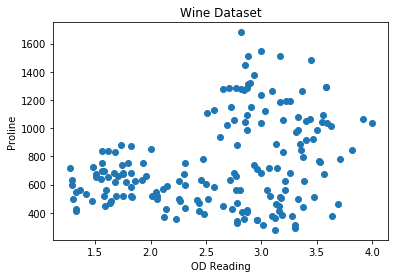

In [15]:
#Visualize the wine dataset
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

**Observation**:  
After plotting the data, we can observe a dataset that has two features and approximately two to three clusters.

#### K-means vs. Agglomerative clustering vs. DBSCAN.

In [16]:
# Generate clusters from K-Means
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

# Generate clusters using Agglomerative Hierarchical Clustering
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


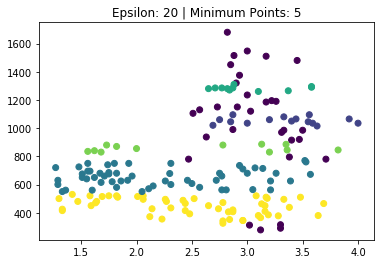

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


Silhouette Score:  0.3997987919957757


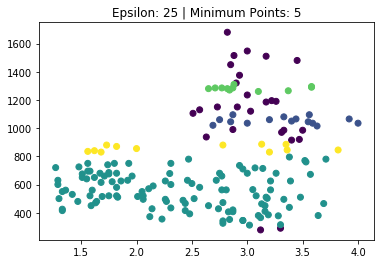

Silhouette Score:  0.35258611037074095


C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


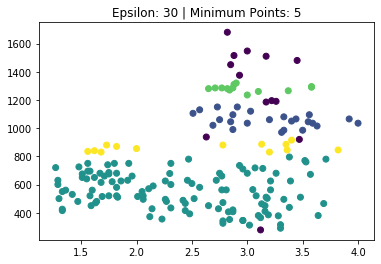

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


Silhouette Score:  0.43763797761597306


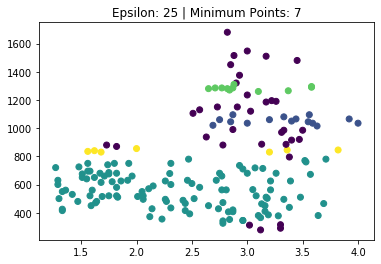

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


Silhouette Score:  0.2711660466706248


C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


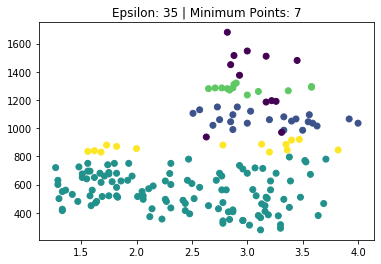

Silhouette Score:  0.4600630149335495


C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


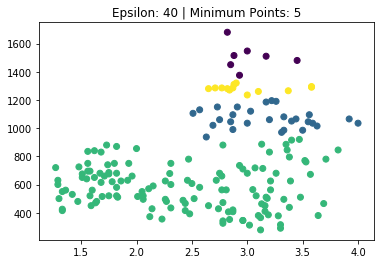

Silhouette Score:  0.5739675293567901


In [17]:
#Create an array of hyperparamenter [epsilon, min sample]
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[40,5]]

#Evaluate DBSCAN hyperparameters and their effect on the silhouette score
for ep,min_sample in db_param_options:
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine_df)
    
    plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=db_clusters)
    plt.title('Epsilon: ' + str(ep) + ' | Minimum Points: ' + str(min_sample))
    plt.show()
    
    print("Silhouette Score: ", \
           silhouette_score(wine_df, db_clusters))

**Observations**:

<table>
<tr><th>Hyperparameters vs. silhouette score </th><th>

| **Epsilon** | **Minimum Points** | **silhouette Score** |
|:-----------:|:------------------:|:-------------------:|
|      20     |          5         |  0.3997987919957757 |
|      25     |          5         | 0.35258611037074095 |
|      30     |          5         | 0.43763797761597306 |
|      *25     |          7         |  0.2711660466706248 |
|      35     |          7         |  0.4600630149335495 |
|      *40     |          5         |  0.5739675293567901 |

</th></tr> </table>

The best silhouette score was produced by neighborhood size of 40, minimum points of 5 **[[40,5]]**. On the other hand, The hyperparamater combination that yielded the worst silhouette score was **[[25,5]]**. For this particular problem, a size of 20 seems to be too small, causing more points to be seen as random noise (purple points). Aditionally, it can be observed that bringing the minimum samples to up 7, adds additional incorrect cluster to our feature space.

In [18]:
# Generate the final clusters using DBSCAN highest silhouette score [[40,5]]
db = DBSCAN(eps=40, min_samples = 5)
db_clusters = db.fit_predict(wine_df)

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


#### Best performing model

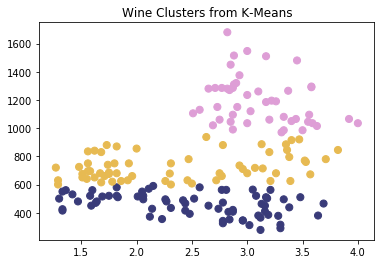

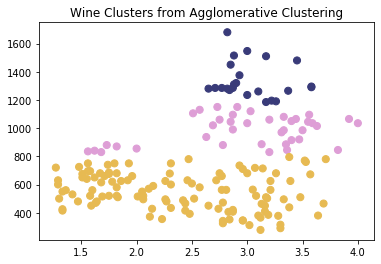

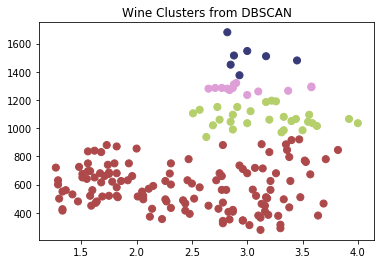

In [19]:
#Visualize clusters generated using each of the three methods
plt.title("Wine Clusters from K-Means")
plt.scatter(wine_df['OD_read'], wine_df['Proline'],\
            c=km_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine_df['OD_read'], wine_df['Proline'],\
            c=ac_clusters,s=50, cmap='tab20b')
plt.show()

plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine_df['OD_read'],wine_df['Proline'],\
            c=db_clusters,s=50, cmap='tab20b')
plt.show()

In [20]:
#Evaluate the silhouette score of each approach
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", \
       silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", \
       silhouette_score(wine_df, ac_clusters))
print("DBSCAN Clustering: ", \
       silhouette_score(wine_df, db_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agg Clustering:  0.5988495817462
DBSCAN Clustering:  0.5739675293567901


**Observation**:

We previosly learned in this wine dataset that the data could only have 3 clusters. Both K-means and Agglomerative clustering have succesfully identified such clusters. DBSCAN on the other hand, identified one  additional cluster which is potential noisy data. However, in terms of the silhouette score, it has underperformed in comparison to its counterparts (0.57 against 0.58 and 0.59 from Kmeans and Agglomerative clustering, respectively). Additional adjustments should be done in the hyperparameters to see if the score can be improved. 

* The Epsilon values to test will be $\ge$ 40, $\le$ 60  with a step of 2.
* The Minimum values to test will be $\ge$ 3, $\le$ 10.

In [21]:
#Test more hyperparameters
db_param_options = []
for ep in range(40,62,2):
    for min_sample in range(3,11):
        db = DBSCAN(eps=ep, min_samples= min_sample)
        db_clusters = db.fit_predict(wine_df)
        sil_score = silhouette_score(wine_df, db_clusters)
        db_param_options.append([ep, min_sample, sil_score])

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roami

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roami

C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roami

In [22]:
#Have a look of the silhouette score with different parameters
dbscan = pd.DataFrame(data=db_param_options, columns=['Epsilon', 'Minimum Sample', 'Silhouette Score'])
print(dbscan)

    Epsilon  Minimum Sample  Silhouette Score
0        40               3          0.477399
1        40               4          0.477399
2        40               5          0.573968
3        40               6          0.545225
4        40               7          0.535882
..      ...             ...               ...
83       60               6          0.519190
84       60               7          0.519190
85       60               8          0.492075
86       60               9          0.492075
87       60              10          0.492075

[88 rows x 3 columns]


In [23]:
#Sort the values by highest to lowest silhouette score
dbscan.sort_values(by=['Silhouette Score'], ascending=False)[['Epsilon', 'Minimum Sample', 'Silhouette Score']].head(5)

,Epsilon,Minimum Sample,Silhouette Score
27,46,6,0.609197
35,48,6,0.609197
34,48,5,0.609197
26,46,5,0.609197
71,56,10,0.580168


In [25]:
#Sort the values by lowest to highest silhouette score
dbscan.sort_values(by=['Silhouette Score'], ascending=True)[['Epsilon', 'Minimum Sample', 'Silhouette Score']].head(5)

,Epsilon,Minimum Sample,Silhouette Score
7,40,10,0.403959
6,40,9,0.436656
22,44,9,0.451162
15,42,10,0.451162
14,42,9,0.451162


C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


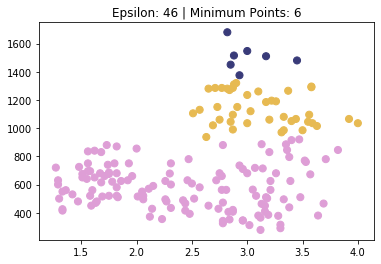

In [26]:
#Plot the best performing silhouette score
db = DBSCAN(eps=46, min_samples = 6)
db_clusters = db.fit_predict(wine_df)

plt.title('Epsilon: 46 | Minimum Points: 6')
plt.scatter(wine_df['OD_read'],wine_df['Proline'],\
            c=db_clusters,s=50, cmap='tab20b')
plt.show()

After performing extra hyperparameter combinations, **[[46,5],[46,6],[48,5][48,6]]** yielded similar silhoutte score (0.609197), outperforming by a small difference K-means and Agglomerative clustering. On the other hand, in the graph we can see the 3 clusters we were expecting, however one of them was classified as noisy data. When comparing to **[[45,5]]**, it can be noted that that both have highlighted in purple the same points. 

Given the previous knowledge we have from the wine data, we could assume that this purple dots represent a smaller batch of one type of wine when comparing it to its counterparts that have significatly larger clusters. Hence, the model flags them as outliers.

[Return to top](#Assignment-3:-Density-Based-Clustering-of-Applications-with-Noise-(DBSCAN))